## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from scipy.stats import sem

# Study data files
mouse_metadata_path =  (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Mouse_metadata.csv")
study_results_path = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count = merged_data_df.index
number_of_rows = len(count)
print(number_of_rows)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_dup_df = merged_data_df[merged_data_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep =False)]
time_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mouse_df = merged_data_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep =False)
clean_data_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data_mouse_df)
print(num_mice)

1883


## Summary Statistics

In [6]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grouped = clean_data_mouse_df.groupby("Drug Regimen")
tumor_mean = drug_grouped["Tumor Volume (mm3)"].mean ()
tumor_median = drug_grouped["Tumor Volume (mm3)"].median()
tumor_var = drug_grouped["Tumor Volume (mm3)"].var()
std_tumor= drug_grouped["Tumor Volume (mm3)"].std()
sem_tumor = drug_grouped["Tumor Volume (mm3)"].sem()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_results= ({
    "Average Tumor Volume":tumor_mean, 
    "Median Tumor Volume":tumor_median, 
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Standard Deviation": std_tumor, 
    "Tumor Volume SEM": sem_tumor
})

#Combine series into a dataframe
summary_results_df = pd.DataFrame(summary_results)
summary_results_df



,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = summary_results_df.agg({"Average Tumor Volume": ["mean"],"Median Tumor Volume":["median"],"Tumor Volume Variance":["var"],"Tumor Volume Standard Deviation":["std"],"Tumor Volume SEM":["sem"]})
agg_df


,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
mean,50.989715,NaN,NaN,NaN,NaN
median,NaN,51.819532,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,0.032665
std,NaN,NaN,NaN,1.215829,NaN
var,NaN,NaN,256.094149,NaN,NaN


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     151
Name: Drug Regimen, dtype: int64


Text(0.5, 1.0, 'Total Number of Measurements Taken on Each Drug Regimen')

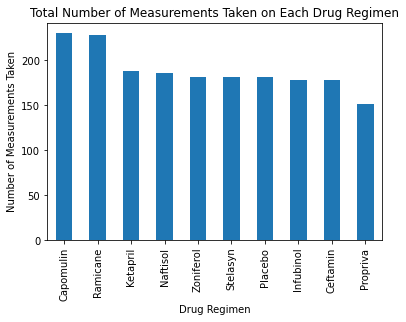

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use clean_data_mouse_df to determine the number of times each drug regimen was implemented
num_measurements= clean_data_mouse_df["Drug Regimen"].value_counts()
print(num_measurements)

#Create a bar chart of the data
bar = num_measurements.plot(x = clean_data_mouse_df["Drug Regimen"],y = num_measurements, kind ="bar", width =.5)

#Create a title
bar.set_xlabel("Drug Regimen")
bar.set_ylabel("Number of Measurements Taken")
bar.set_title("Total Number of Measurements Taken on Each Drug Regimen")

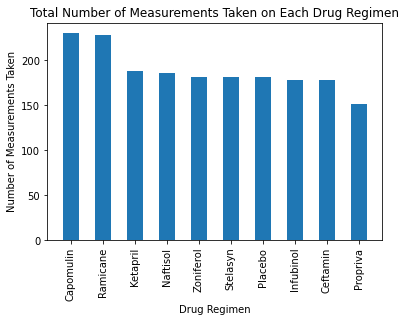

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn","Placebo","Infubinol", "Ceftamin", "Propriva"]


x_axis = np.arange(len(drug_regimen))
y_axis = np.arange(len(num_measurements))

plt.bar(drug_regimen, num_measurements, width = .5)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.xticks(drug_regimen, rotation='vertical')

plt.show()


Male      958
Female    925
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Mice in Study, By Gender')

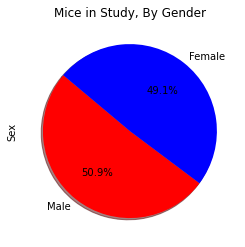

In [10]:
gender = clean_data_mouse_df["Sex"].value_counts()
print(gender)
labels = ["Female","Male"]
colors = ["red", "blue"]

pie = gender.plot.pie(colors = colors, autopct ="%1.1f%%", shadow=True, startangle=140 )
plt.title("Mice in Study, By Gender")

Text(0.5, 1.0, 'Mice in Study, by Gender')

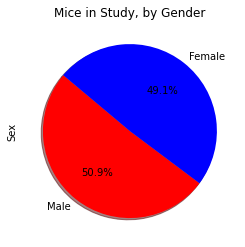

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [958, 925]
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex")
plt.title("Mice in Study, by Gender")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
#Capomulin final time point
Capomulin_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Capomulin", :]
Capomulin_final_time_pt = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_final_time_pt
Capomulin_vol = pd.DataFrame(Capomulin_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")


#Ramicane final time point
Ramicane_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Ramicane", :]
Ramicane_final_time_pt = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_final_time_pt
Ramicane_vol = pd.DataFrame(Ramicane_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")


#Infubinol final time point
Infubinol_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Infubinol", :]
Infubinol_final_time_pt = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_final_time_pt
Infubinol_vol = pd.DataFrame(Infubinol_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")
Infubinol_merge.head()

#Ceftamin final time point
Ceftamin_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Ceftamin", :]
Ceftamin_final_time_pt = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_final_time_pt
Ceftamin_vol = pd.DataFrame(Ceftamin_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [13]:
#Familiarize myself with the data
Capomulin_merge.head()
Capomulin_merge.describe()

,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
count,25.00000,25.000000,25.0000,25.000000,25.000000
mean,41.00000,14.040000,20.1200,36.667568,1.280000
std,10.10363,7.850053,2.8624,5.715188,0.979796
min,10.00000,1.000000,15.0000,23.343598,0.000000
25%,45.00000,7.000000,17.0000,32.377357,1.000000
50%,45.00000,17.000000,21.0000,38.125164,1.000000
75%,45.00000,21.000000,22.0000,40.159220,2.000000
max,45.00000,24.000000,25.0000,47.685963,3.000000


In [14]:
#Merge individual data into one for reference in for loop later
Cap_Ram_merge = pd.merge(Capomulin_merge, Ramicane_merge, how = "outer")
Cap_Ram_merge
Inf_Ceft_merge = pd.merge(Infubinol_merge,Ceftamin_merge, how = "outer")
Complete_merge = pd.merge(Cap_Ram_merge,Inf_Ceft_merge, how = "outer")
complete_merge_df = pd.DataFrame(Complete_merge)
complete_merge_df["Drug Regimen"].value_counts()
complete_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [15]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
for drug in treatments:
    selected_regimen = complete_merge_df.loc[complete_merge_df["Drug Regimen"] == drug]
    values = selected_regimen["Tumor Volume (mm3)"]
    tumor_vol_data.append(values)
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile fr {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile range for {drug} is: {iqr}")
    #print(tumor_vol_data)
    print ("---------------------------------------------------------")

The lower quartile fr Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
---------------------------------------------------------
The lower quartile fr Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
---------------------------------------------------------
The lower quartile fr Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
---------------------------------------------------------
The lower quartile fr Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The interquartile range for Ceftamin is: 15.577752179999997
---------------------------------------------------------


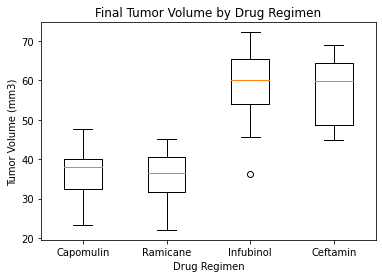

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
fig1, ax = plt.subplots()
ax.set_title("Final Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],treatments)

#data = [data, d2, d2[::2]]
#fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
#ax7.boxplot(data)

plt.show()

## Line and Scatter Plots

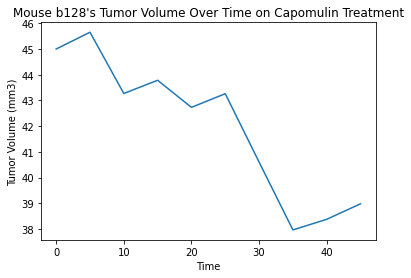

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )
b128_df = clean_data_mouse_df.loc[clean_data_mouse_df["Mouse ID"] == "b128",:]
b128_df

time = b128_df["Timepoint"]
tumor_vol = b128_df["Tumor Volume (mm3)"]

plt.plot(time, tumor_vol)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse b128's Tumor Volume Over Time on Capomulin Treatment")

# Show the chart
plt.show()
b128_df

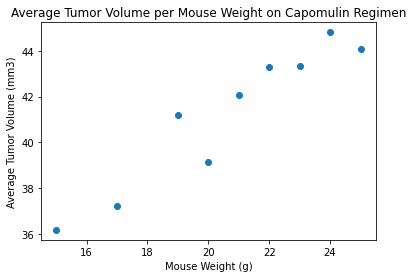

In [35]:
# Generate a scatter plot of average tumor volume vs. unique mouse weight for the Capomulin regimen
cap_unique_weight = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Capomulin",:].groupby("Weight (g)").mean()
cap_unique_weight

mouse_unique_weight = cap_unique_weight.index
avg_tumor_vol = cap_unique_weight["Tumor Volume (mm3)"]

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Mouse Weight on Capomulin Regimen")

plt.scatter(mouse_unique_weight, avg_tumor_vol)
plt.show()


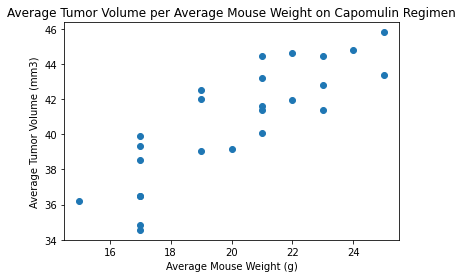

In [36]:
# Generate a scatter plot of average tumor volume vs. average mouse weight for the Capomulin regimen
cap_only = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID").mean()
cap_only

avg_mouse_weight = cap_only["Weight (g)"]
avg_tumor_vol = cap_only["Tumor Volume (mm3)"]

plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Average Mouse Weight on Capomulin Regimen")

plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.show()


## Correlation and Regression

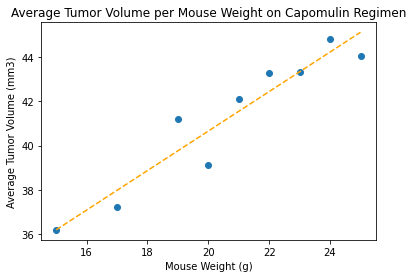

In [37]:
#Generate scatterplot to overlay line of best fit
mouse_weight = cap_unique_weight.index
avg_tumor_vol = cap_unique_weight["Tumor Volume (mm3)"]
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Mouse Weight on Capomulin Regimen")
plt.scatter(mouse_unique_weight, avg_tumor_vol)

# Calculate the correlation coefficient and linear regression model for unique mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(mouse_unique_weight, avg_tumor_vol)
fit = slope * mouse_unique_weight + intercept
plt.plot(mouse_unique_weight, fit, color = "orange", linestyle = "dashed")
plt.show()

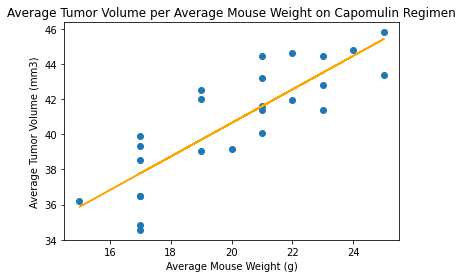

In [38]:
#Generate scatterplot to overlay line of best fit
avg_mouse_weight = cap_only["Weight (g)"]
avg_tumor_vol = cap_only["Tumor Volume (mm3)"]
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Average Mouse Weight on Capomulin Regimen")
plt.scatter(avg_mouse_weight, avg_tumor_vol)
# Calculate the correlation coefficient and linear regression model for average mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(avg_mouse_weight, avg_tumor_vol)
fit = slope * avg_mouse_weight + intercept
plt.plot(avg_mouse_weight, fit, color = "orange")
plt.show()